<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_an%C3%A1lises_Marketing_KMeans_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Probelma de Marketing, usando Machine Learning com o algoritimo **K-Means**

Bibliotecas a serem usadas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
base = pd.read_csv('/content/Marketing_data.csv')

In [3]:
base.shape

(8950, 18)

In [4]:
base.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
base.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
base[base['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [8]:
base['CASH_ADVANCE'].max()

47137.211760000006

In [9]:
base['CASH_ADVANCE'].min()

0.0

In [10]:
base[base['CASH_ADVANCE'] == 47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


**Visualização dos dados**

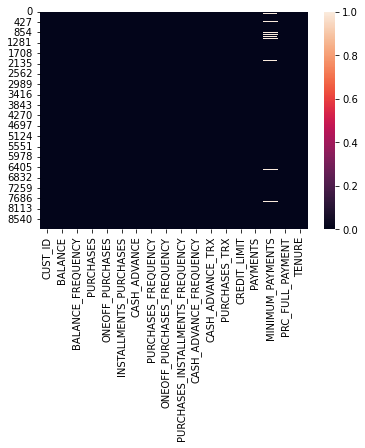

In [11]:
sns.heatmap(base.isnull());

In [12]:
base.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [13]:
base['MINIMUM_PAYMENTS'].mean()

864.2065423050814

In [14]:
base.loc[(base['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = base['MINIMUM_PAYMENTS'].mean()

In [15]:
base['CREDIT_LIMIT'].mean()

4494.449450364621

In [16]:
base.loc[(base['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = base['CREDIT_LIMIT'].mean()

In [17]:
base.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

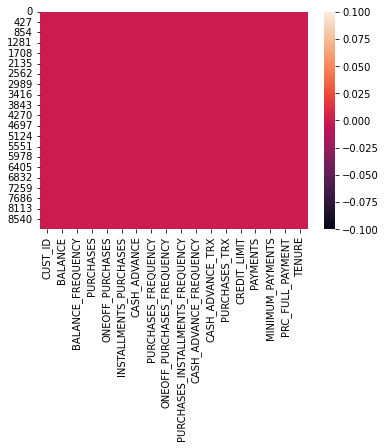

In [18]:
sns.heatmap(base.isnull());

In [19]:
base.duplicated().sum()

0

In [20]:
base.drop('CUST_ID', axis = 1, inplace = True)

In [21]:
base.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [22]:
base.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [23]:
len(base.columns)

17

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

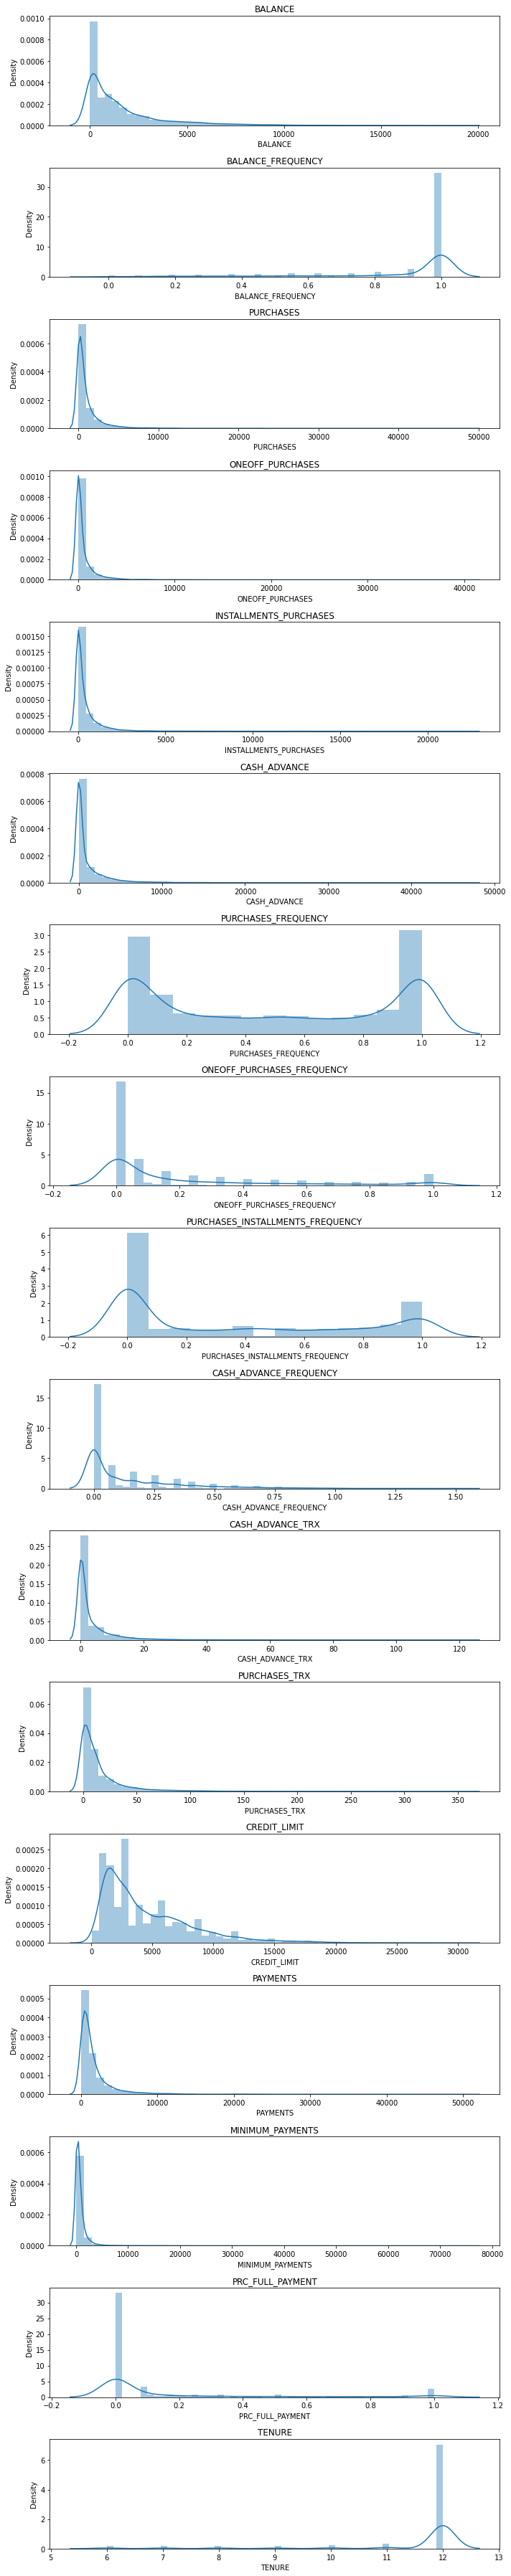

In [24]:
plt.figure(figsize=(10,50))
for i in range(len(base.columns)):
  plt.subplot(17, 1, i + 1)
  sns.distplot(base[base.columns[i]], kde = True)
  plt.title(base.columns[i])
plt.tight_layout();

In [25]:
correlations = base.corr()

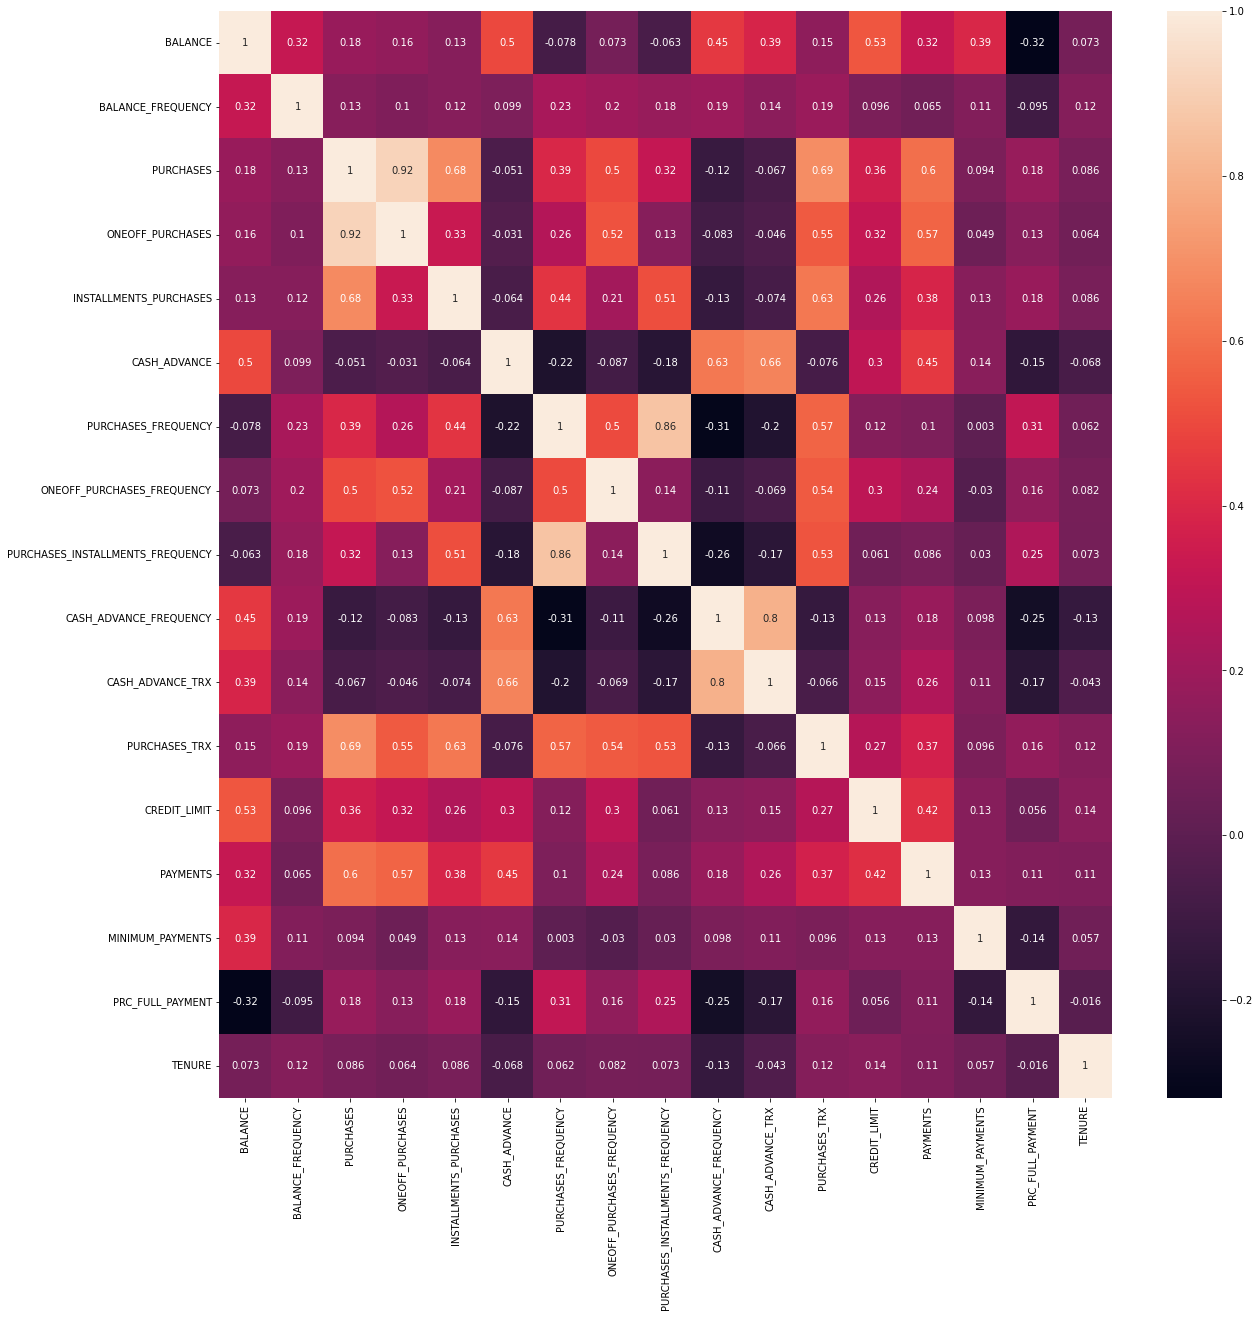

In [26]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

**Definição numero de clusters**

In [27]:
min(base['BALANCE']), max(base['BALANCE'])

(0.0, 19043.13856)

In [28]:
scaler = StandardScaler()
base_scaled = scaler.fit_transform(base)

In [29]:
type(base_scaled), type(base)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [30]:
min(base_scaled[0]), max(base_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [31]:
base_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [32]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(base_scaled)
  wcss_1.append(kmeans.inertia_)

In [33]:
print(wcss_1)

[152149.99999999983, 127785.04965248297, 111986.64440741186, 99073.93826774803, 91502.98259428913, 84852.59400226288, 79756.08114768367, 74494.8762588323, 70912.64677726709, 66478.96069032565, 63635.43259721015, 61376.81179009825, 59175.54614617674, 57506.088988143165, 55890.10447945558, 54595.52274472028, 53021.039425078925, 51752.44356028938, 50554.89832872883]


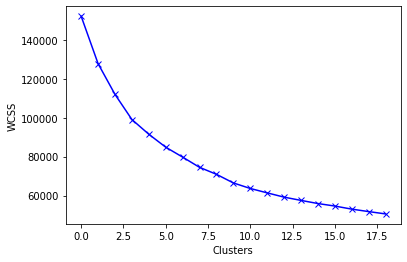

In [34]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

**Agrupamento com k-means**

In [35]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(base_scaled)
labels = kmeans.labels_

In [36]:
labels, len(labels)

(array([3, 0, 7, ..., 2, 3, 4], dtype=int32), 8950)

In [37]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([1136,  362, 2126, 2694, 1286,  160,   24, 1162]))

In [38]:
kmeans.cluster_centers_

array([[ 1.32400024e+00,  3.77910215e-01, -2.99650164e-01,
        -2.14561952e-01, -3.14378863e-01,  1.19290941e+00,
        -6.22054910e-01, -3.07401687e-01, -5.43011024e-01,
         1.57101364e+00,  1.21651686e+00, -3.71462975e-01,
         6.92914162e-01,  1.88376104e-01,  4.77803344e-01,
        -4.44841223e-01, -1.63376829e-01],
       [ 1.05088244e+00,  4.66032500e-01,  2.45172189e+00,
         1.79496992e+00,  2.49944427e+00, -1.62100535e-01,
         1.16396168e+00,  1.54353738e+00,  1.27088916e+00,
        -2.78593701e-01, -1.59519853e-01,  3.09281452e+00,
         1.27917702e+00,  1.38048251e+00,  5.90010892e-01,
         2.36093012e-01,  3.37973320e-01],
       [-4.00629603e-01,  3.08114725e-01, -5.84743975e-02,
        -2.55659110e-01,  3.31389491e-01, -3.64568841e-01,
         9.97726176e-01, -4.09716122e-01,  1.19374968e+00,
        -4.69226334e-01, -3.62687135e-01,  1.44686948e-01,
        -3.22712081e-01, -2.45480943e-01, -6.40831840e-02,
         3.74207229e-01, -3.2

In [39]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [base.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.324000,0.377910,-0.299650,-0.214562,-0.314379,1.192909,-0.622055,-0.307402,-0.543011,1.571014,1.216517,-0.371463,0.692914,0.188376,0.477803,-0.444841,-0.163377
1,1.050882,0.466032,2.451722,1.794970,2.499444,-0.162101,1.163962,1.543537,1.270889,-0.278594,-0.159520,3.092815,1.279177,1.380483,0.590011,0.236093,0.337973
2,-0.400630,0.308115,-0.058474,-0.255659,0.331389,-0.364569,0.997726,-0.409716,1.193750,-0.469226,-0.362687,0.144687,-0.322712,-0.245481,-0.064083,0.374207,-0.032272
3,-0.109778,0.368476,-0.352462,-0.235684,-0.400283,-0.166894,-0.834153,-0.374659,-0.752438,0.006829,-0.112204,-0.478685,-0.402174,-0.292298,-0.081594,-0.451678,0.032115
4,-0.698456,-2.146073,-0.317642,-0.236583,-0.316312,-0.308288,-0.564493,-0.436168,-0.458066,-0.481821,-0.360869,-0.427367,-0.212114,-0.223657,-0.254921,0.254908,-0.162854
5,1.818623,0.318581,0.073231,0.077879,0.029743,4.435871,-0.200967,0.026548,-0.150312,2.510569,3.771640,0.021480,1.393875,3.185684,0.585177,-0.162065,0.057113
6,1.838131,0.292625,12.491209,12.550011,6.476826,-0.023453,0.991268,2.051914,0.835604,-0.484482,-0.225738,4.371742,3.253863,8.717656,1.034419,1.162906,0.298409
7,-0.148407,0.392535,0.536802,0.656654,0.062672,-0.329722,0.986107,1.874631,0.205879,-0.407505,-0.330038,0.624526,0.423486,0.141810,-0.163838,0.440056,0.205058


1) Grupo 0 (VIP/Prime): limite do cartão alto (15570) e o mais alto percentual de pagamento da fatura completa (0.47). Aumentar o limite do cartão e o hábito de compras

2) Grupo 3: Clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possui menos dinheiro na conta corrente (104) e não sacam muito dinheiro do limite do cartão (302). 23% de pagamento da fatura completa do cartão de crédito

3) Grupo 5: usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente (5119) e sacam muito dinheiro do cartão de crédito (5246), compram pouco (0.3) e usam bastante o limite do cartão para saques (0.51). Pagam muito pouco a fatura completa (0.03)

4) Grupo 7 (clientes novos): clientes mais novos (7.23) e que mantém pouco dinheiro na conta corrente (863) 

In [40]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [base.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4320.269574,0.966794,362.997639,236.308476,126.778740,3480.457875,0.240690,0.110754,0.148631,0.449520,11.550661,5.476652,7015.554666,2278.474216,1977.707080,0.023606,11.298678
1,3751.797914,0.987670,6241.346436,3571.719807,2671.284088,638.938718,0.957505,0.662925,0.869521,0.079395,2.160221,91.585635,9148.618785,5729.505461,2239.202038,0.222768,11.969613
2,730.598127,0.950260,878.273382,168.095611,710.739050,214.353222,0.890786,0.080231,0.838864,0.041247,0.773754,18.306209,3320.290867,1022.500574,714.863385,0.263164,11.474130
3,1335.980674,0.964559,250.163343,201.250683,49.096289,628.886435,0.155565,0.090690,0.065399,0.136511,2.483117,2.811503,3031.175015,886.970361,674.054934,0.021607,11.560297
4,110.697359,0.368886,324.558406,199.758227,125.030972,332.376221,0.263792,0.072340,0.182390,0.038727,0.786159,4.087092,3722.693541,1085.678371,270.124630,0.228271,11.299378
5,5349.784647,0.952740,1159.663750,721.699750,437.964000,10281.100382,0.409693,0.210377,0.304700,0.637535,28.987500,15.243750,9565.937500,10955.387025,2227.935844,0.106313,11.593750
6,5390.389571,0.946591,27690.865833,21422.884583,6267.981250,929.689201,0.888194,0.814583,0.696528,0.038194,1.708333,123.375000,16333.333333,26969.902881,3274.877294,0.493845,11.916667
7,1255.578023,0.970259,2150.090379,1682.349096,467.741282,287.429121,0.886123,0.761696,0.446259,0.053598,0.996558,30.233219,6035.265999,2143.670345,482.388305,0.282424,11.791738


In [41]:
labels, len(labels)

(array([3, 0, 7, ..., 2, 3, 4], dtype=int32), 8950)

In [42]:
base_cluster = pd.concat([base, pd.DataFrame({'cluster': labels})], axis = 1)
base_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,7
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


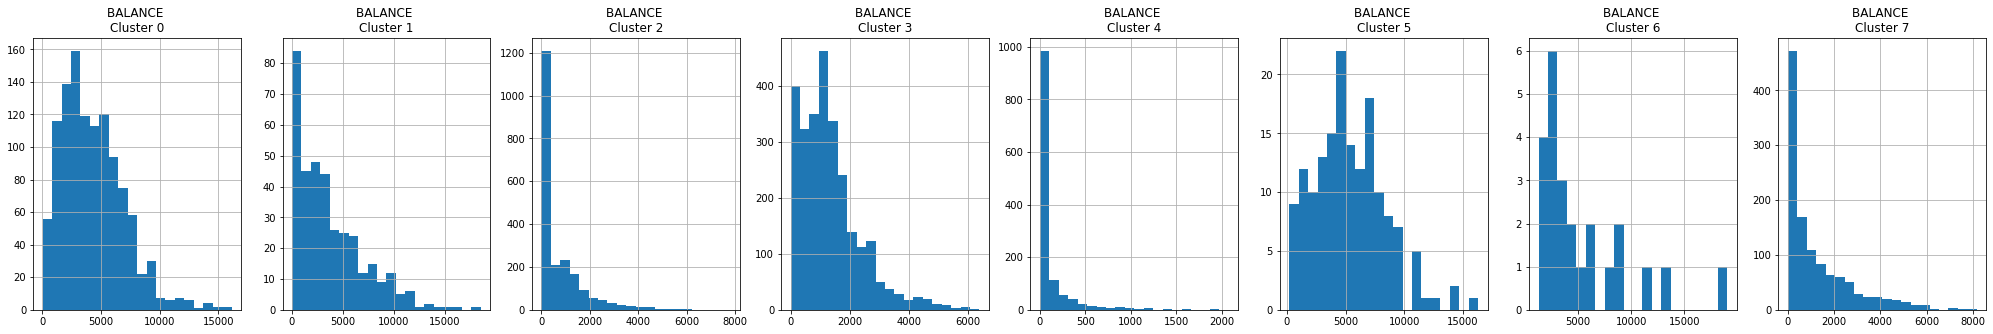

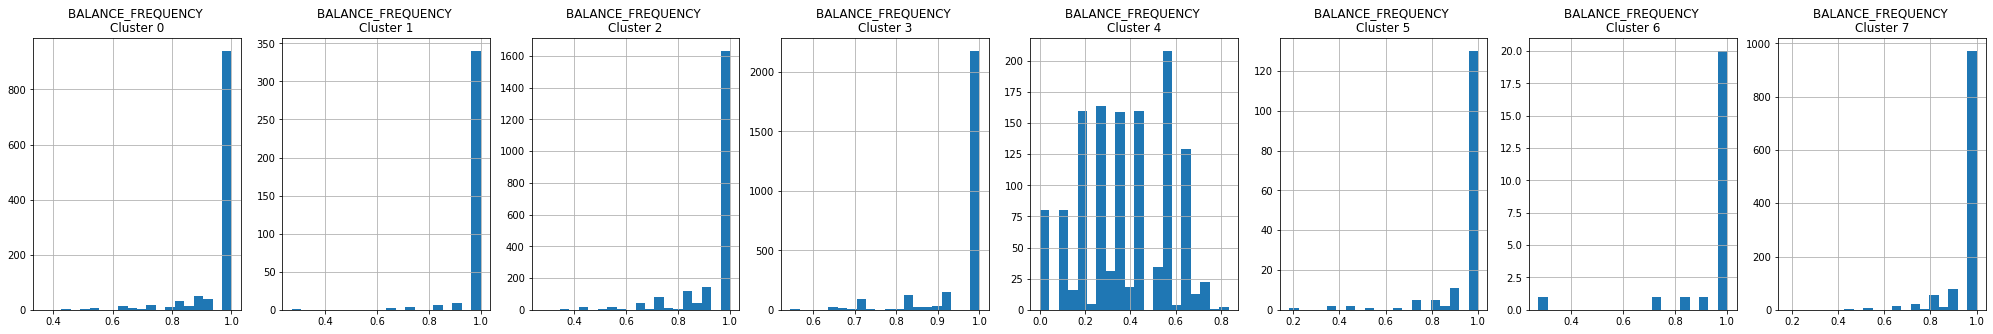

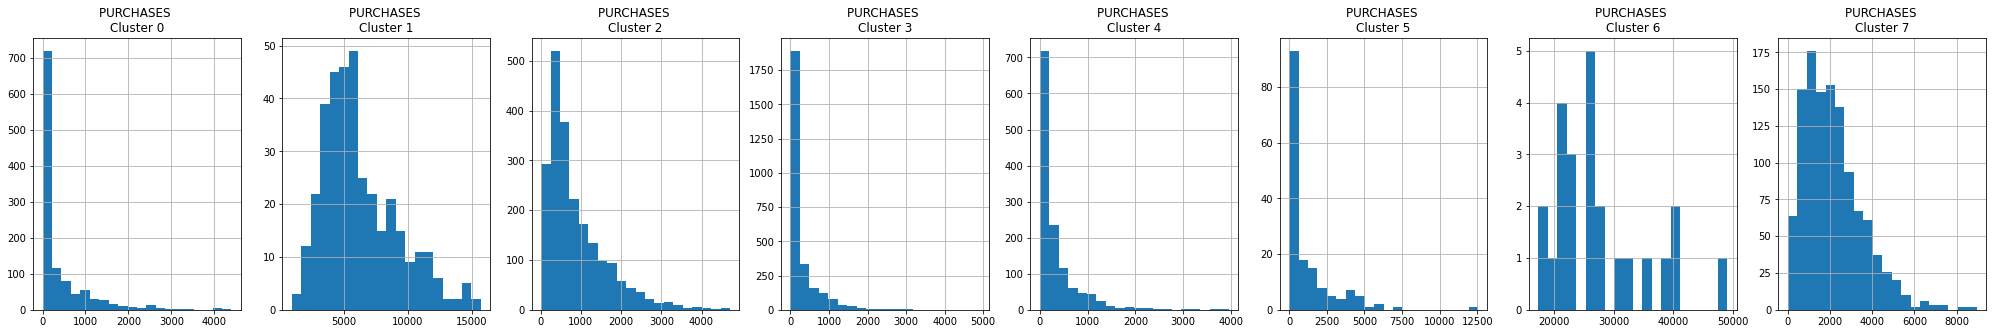

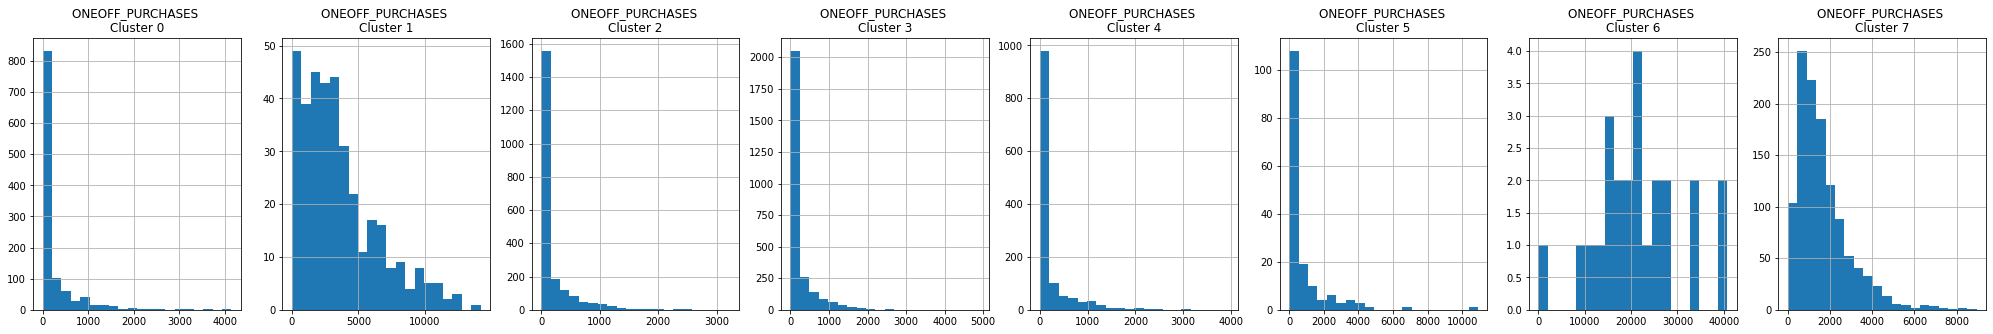

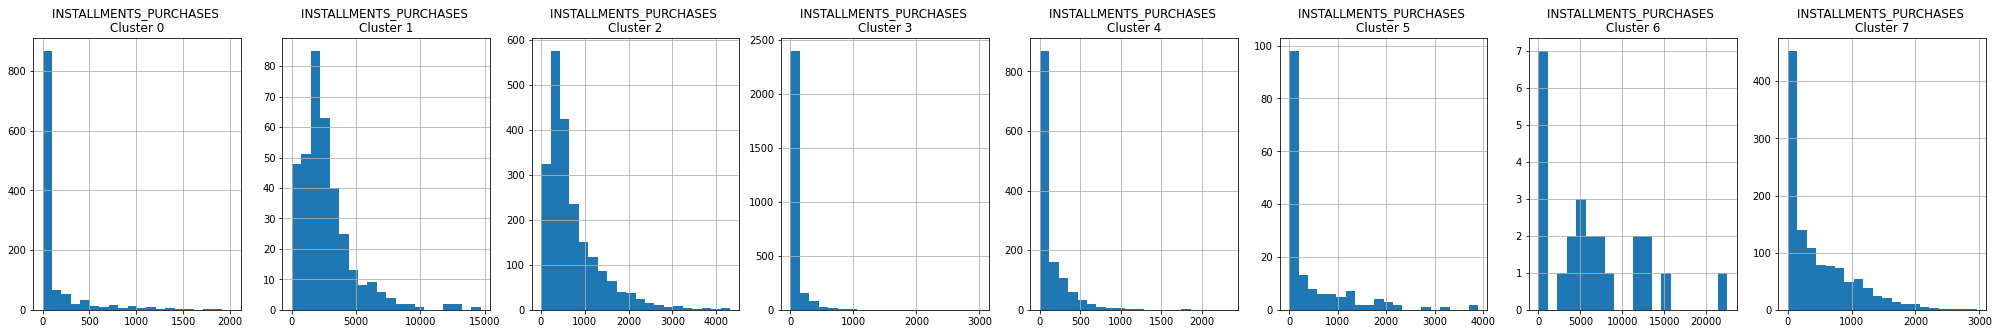

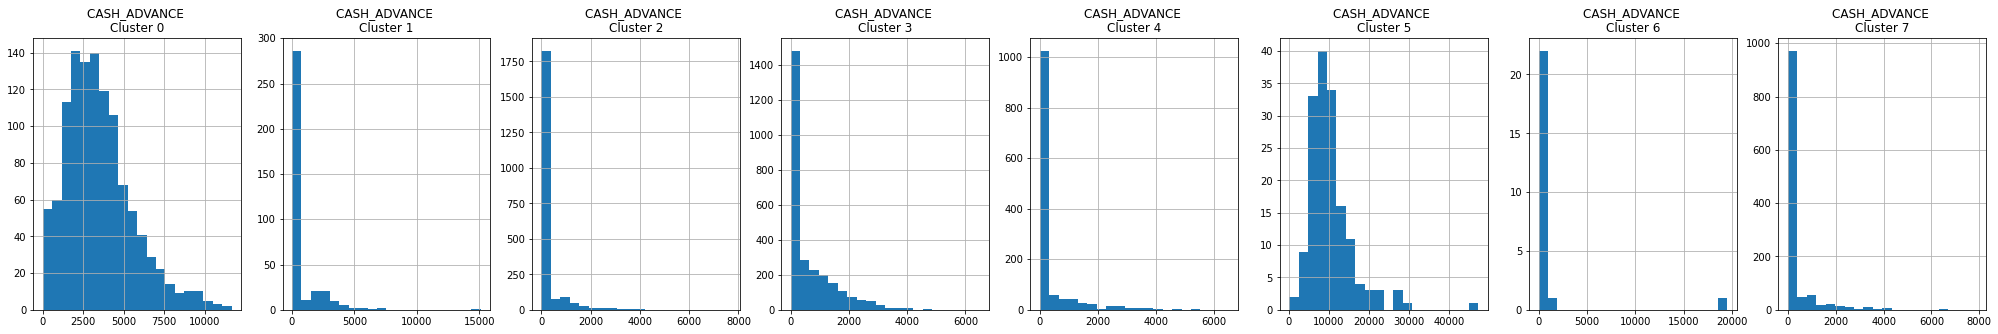

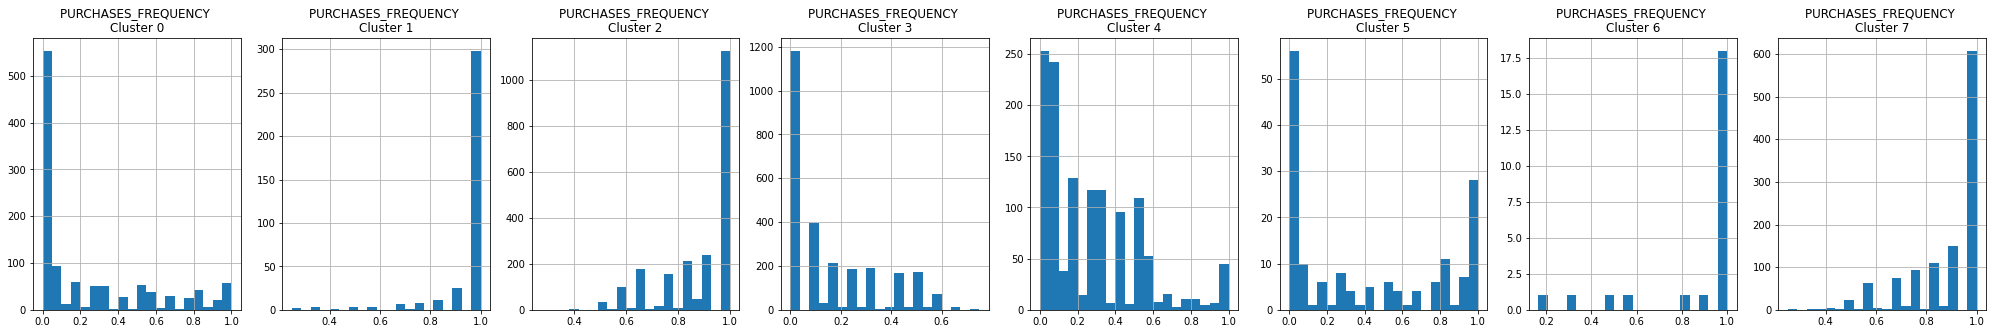

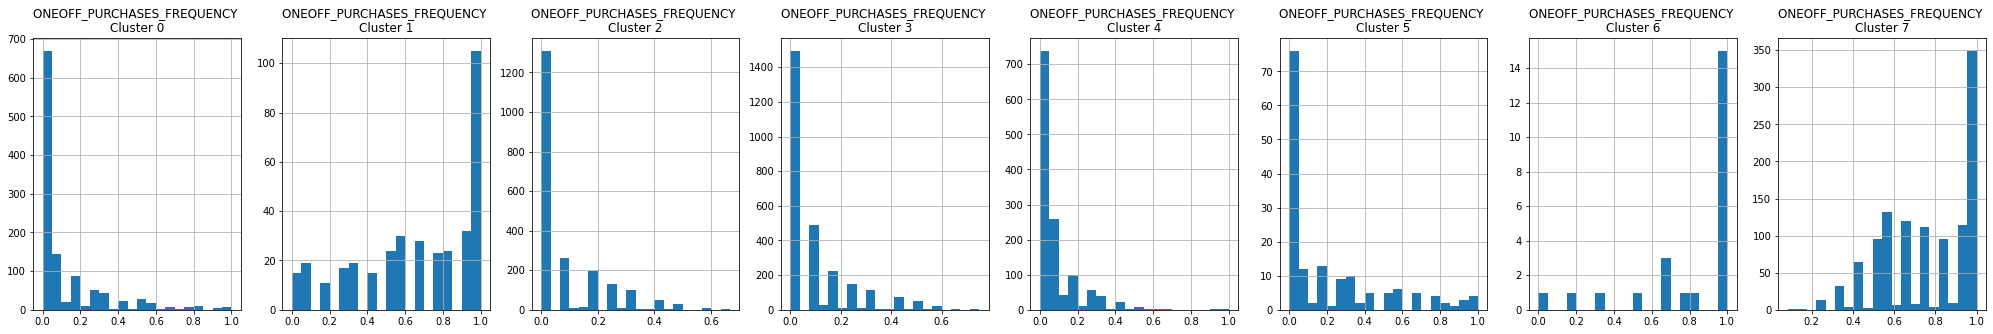

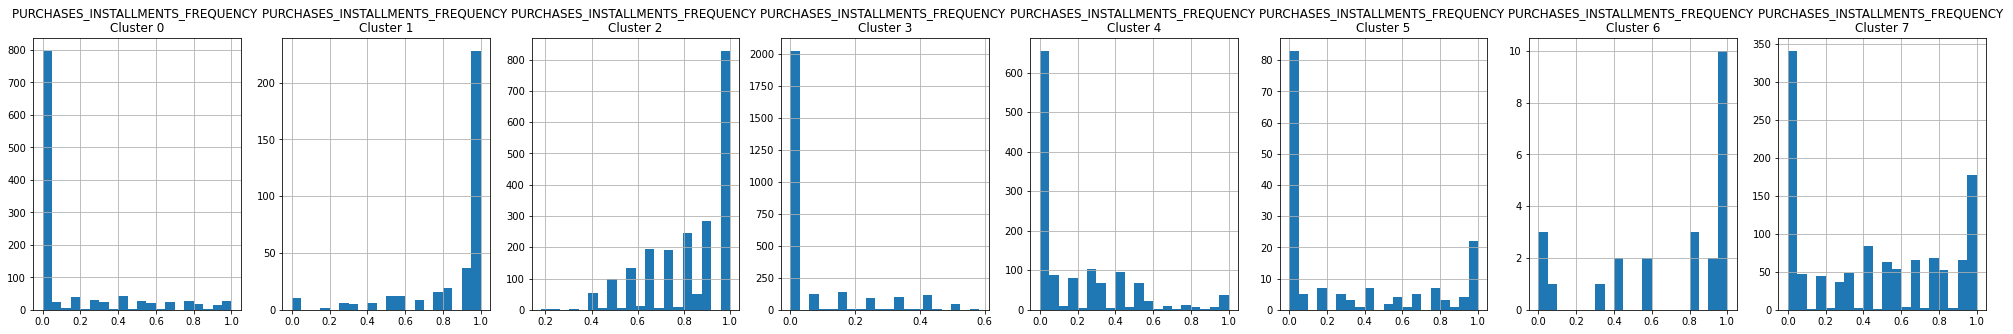

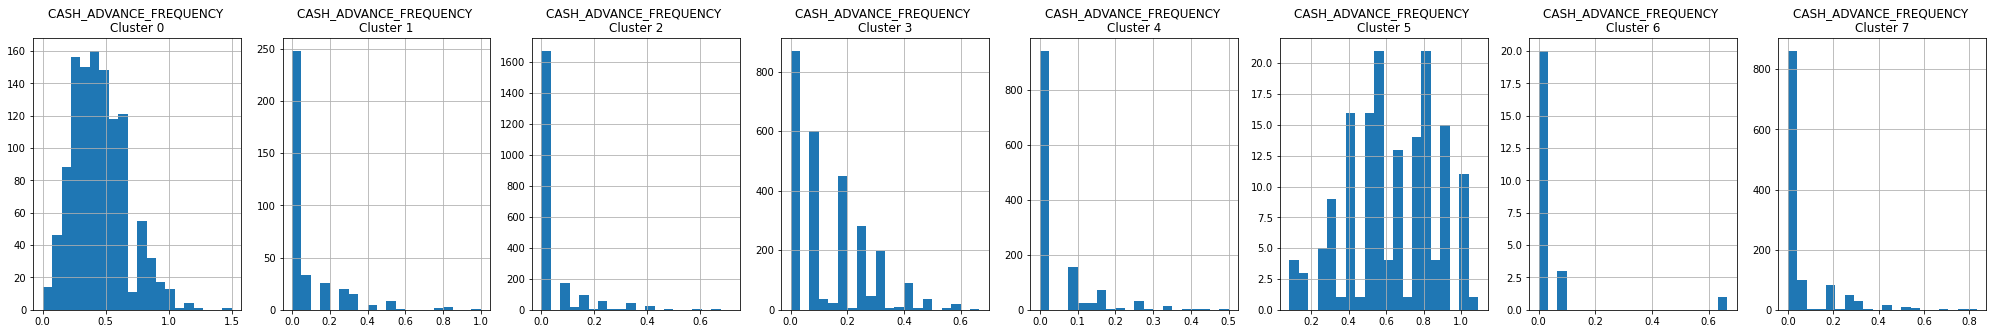

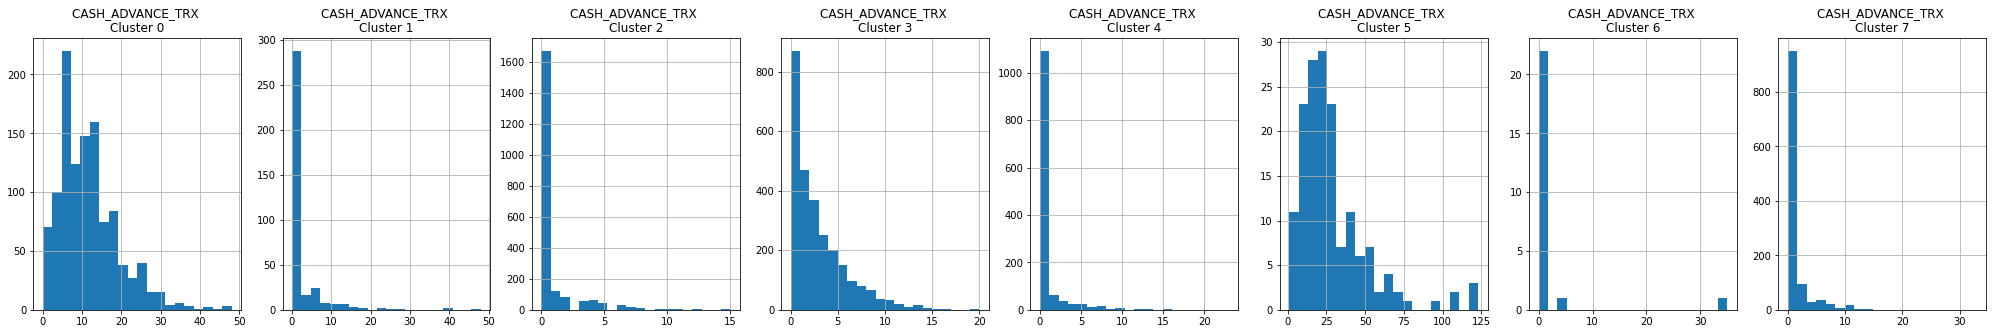

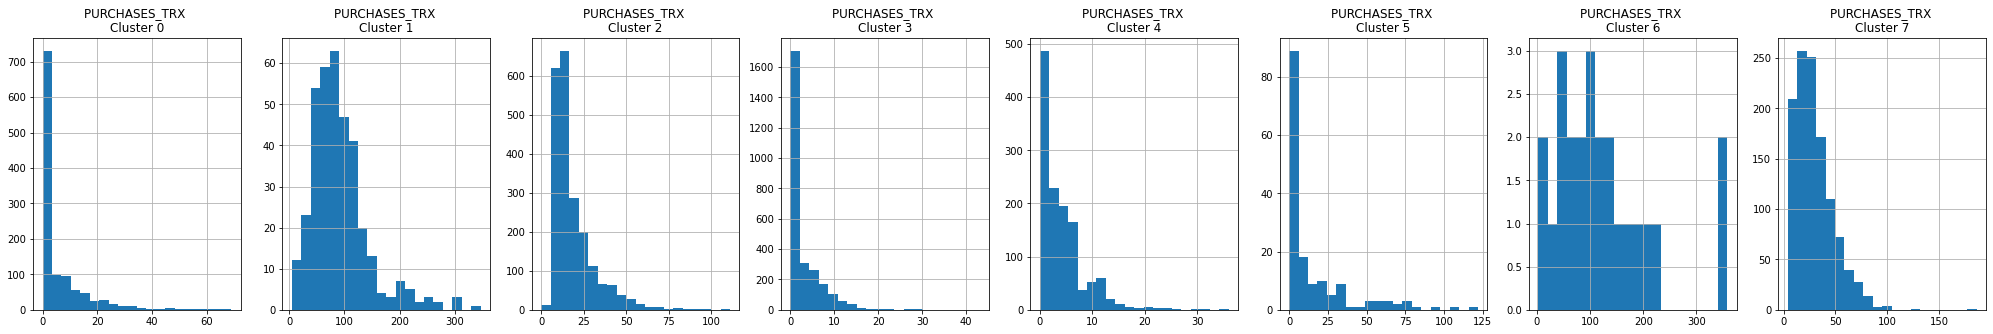

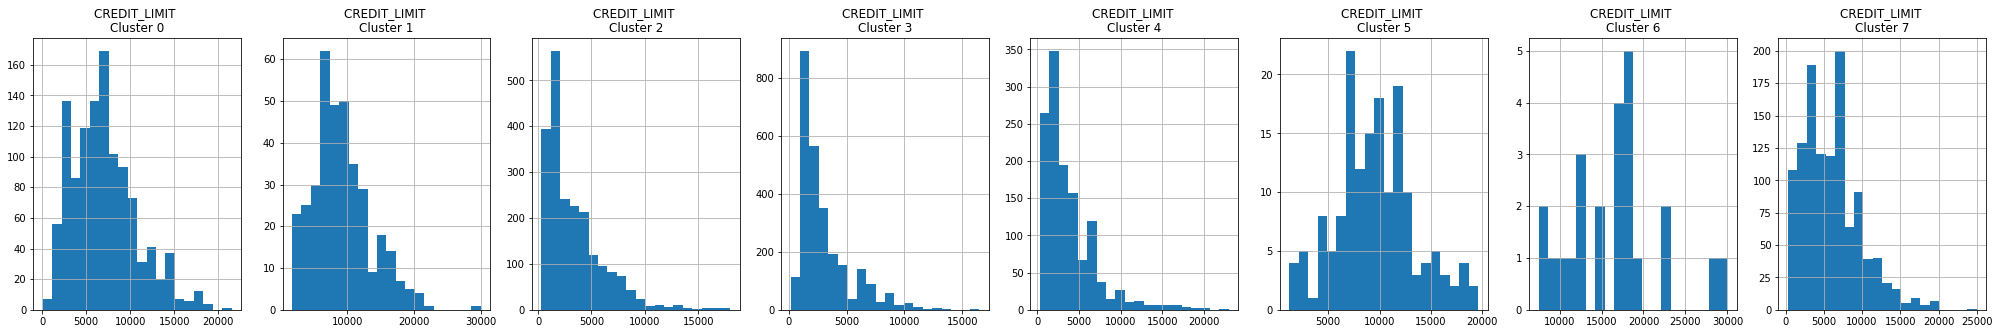

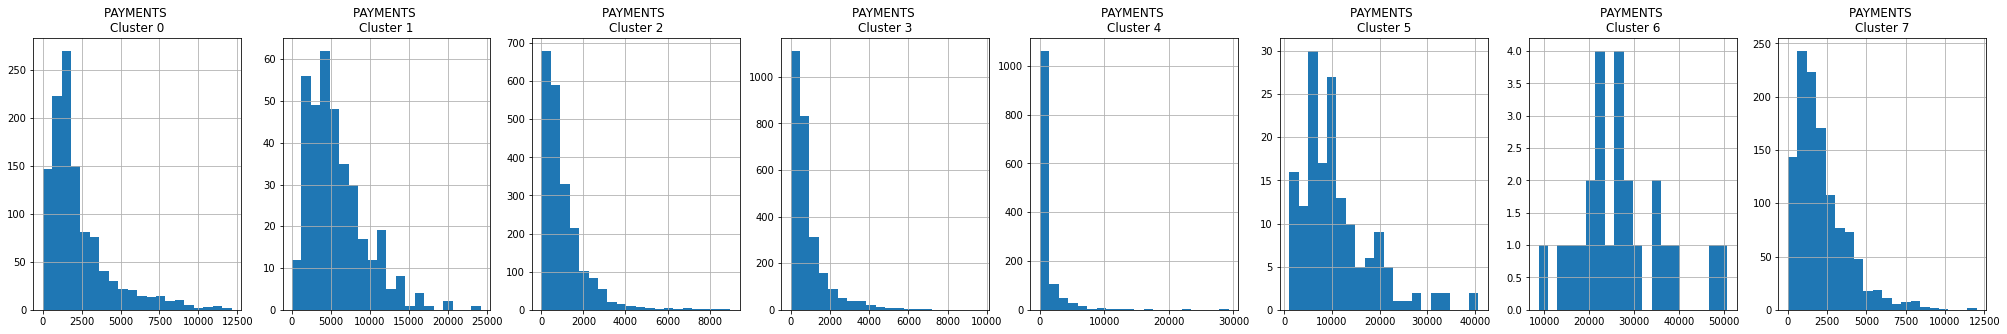

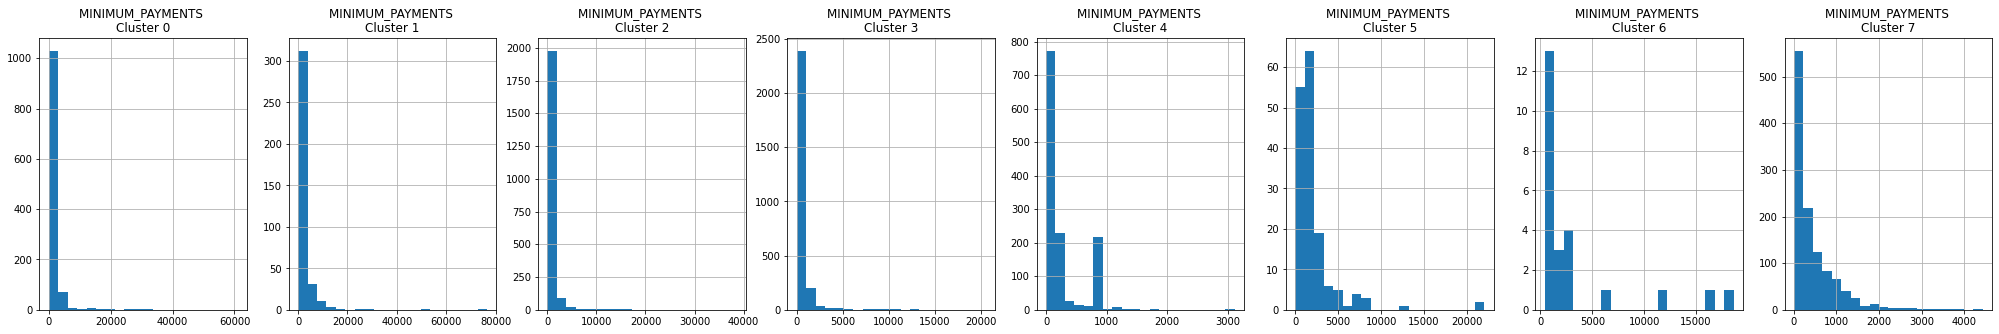

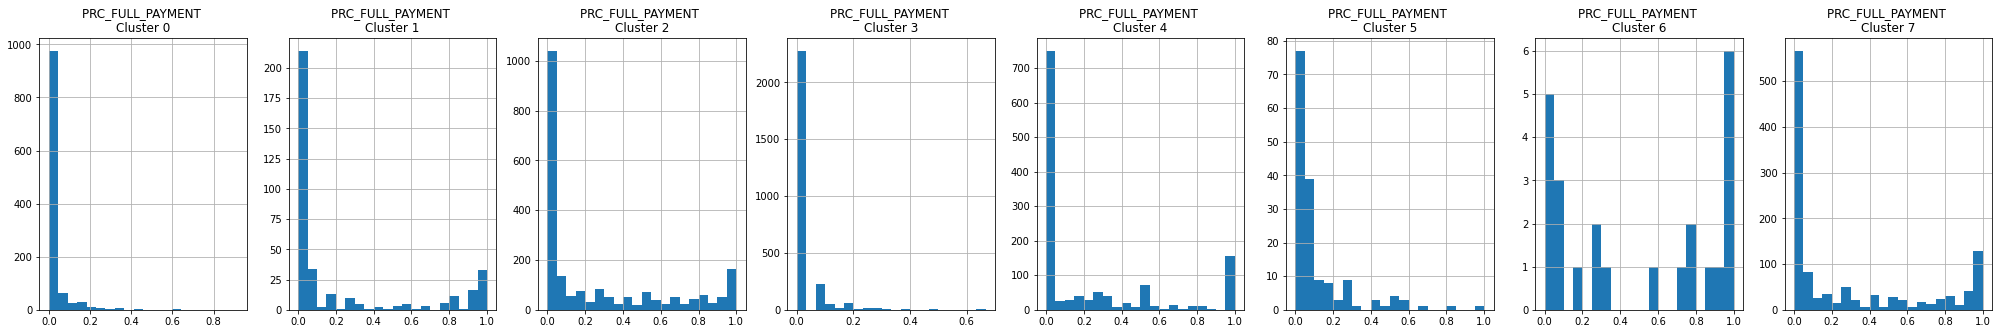

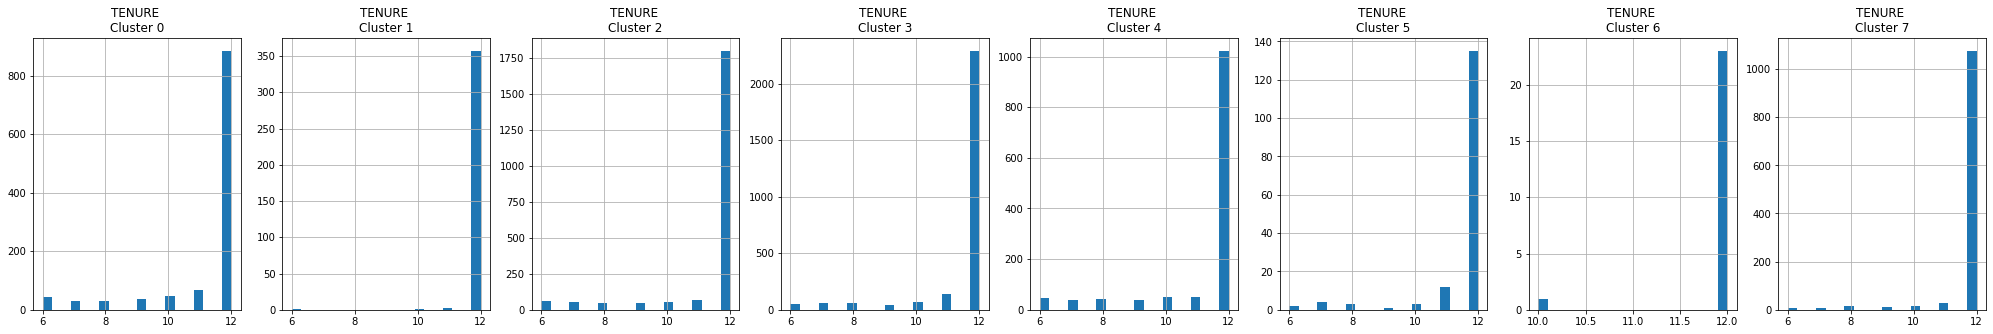

In [43]:
for i in base.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = base_cluster[base_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [44]:
base_ordered = base_cluster.sort_values(by = 'cluster')
base_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4474,5256.695330,1.000000,188.60,188.60,0.00,1934.418697,0.083333,0.083333,0.000000,0.333333,4,1,9000.0,1421.954639,1452.249653,0.0,12,0
6046,6495.510054,1.000000,716.76,0.00,716.76,6771.644515,1.000000,0.000000,0.916667,0.166667,5,12,10000.0,1215.678547,2348.721844,0.0,12,0
1359,9680.188434,1.000000,0.00,0.00,0.00,2034.051299,0.000000,0.000000,0.000000,0.166667,3,0,12000.0,2428.847512,3502.851217,0.0,12,0
3514,3788.416968,0.857143,718.06,608.02,110.04,6348.573930,0.857143,0.428571,0.428571,0.571429,19,9,7500.0,294.502943,1107.881169,0.0,7,0
3516,1123.476228,1.000000,933.38,497.60,435.78,2721.894656,0.666667,0.416667,0.583333,0.500000,13,21,4000.0,339.284273,442.797661,0.0,12,0


In [45]:
base_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
2395,495.069704,1.0,2610.30,902.60,1707.70,0.000000,1.00,0.416667,1.000000,0.000000,0,34,8500.0,2217.869091,219.629629,0.250000,12,7
6950,803.685960,1.0,1690.93,1690.93,0.00,0.000000,0.60,0.600000,0.000000,0.000000,0,25,1200.0,1783.396008,509.554302,0.000000,10,7
6944,1682.892726,1.0,2996.92,2282.59,714.33,0.000000,1.00,0.916667,0.750000,0.000000,0,95,5000.0,1222.419114,705.863650,0.000000,12,7
6992,2493.589343,1.0,4655.55,3299.43,1356.12,0.000000,0.75,0.500000,0.666667,0.000000,0,44,6500.0,1231.610235,832.178621,0.000000,12,7
2457,862.481024,1.0,2267.38,1674.75,592.63,282.991201,1.00,1.000000,0.666667,0.166667,2,41,4500.0,3644.186477,341.586200,0.333333,12,7


In [46]:
base_ordered.to_csv('cluster.csv')

**PCA**

In [47]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(base_scaled)
principal_comp

array([[-1.68222075, -1.07645165],
       [-1.13829666,  2.50647693],
       [ 0.96968382, -0.38351924],
       ...,
       [-0.92620307, -1.81078586],
       [-2.33655101, -0.65796769],
       [-0.55642136, -0.40046645]])

In [48]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076452
1,-1.138297,2.506477
2,0.969684,-0.383519
3,-0.873630,0.043160
4,-1.599433,-0.688579


In [49]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076452,3
1,-1.138297,2.506477,0
2,0.969684,-0.383519,7
3,-0.873630,0.043160,3
4,-1.599433,-0.688579,3


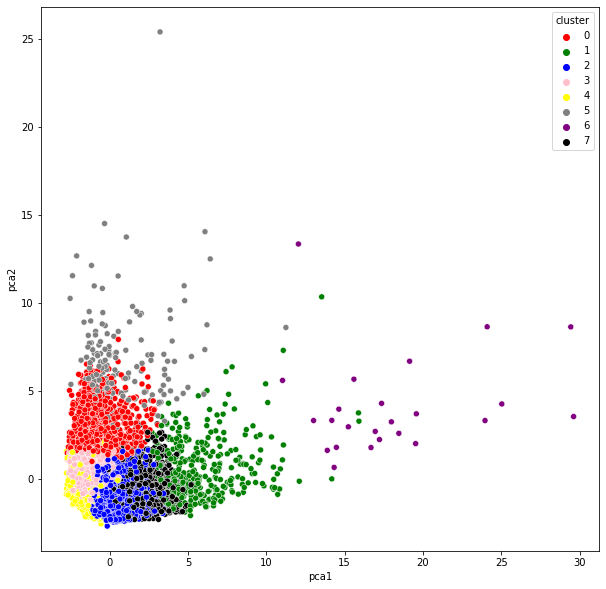

In [52]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black']);

**Autoencoders**

In [53]:
base_scaled.shape

(8950, 17)

In [54]:

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [55]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [56]:
# autoencoder
autoencoder = Model(input_df, decoded)

In [57]:
# encoder
encoder = Model(input_df, encoded)

In [58]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [60]:
autoencoder.fit(base_scaled, base_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 11s 36ms/step - loss: 0.2335
Epoch 2/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0953
Epoch 3/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0632
Epoch 4/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0614
Epoch 5/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0868
Epoch 6/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0445
Epoch 7/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0484
Epoch 8/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0510
Epoch 9/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0408
Epoch 10/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0543
Epoch 11/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0431
Epoch 12/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0555
Epoch 13/50


In [61]:
base_scaled.shape

(8950, 17)

In [62]:
compact = encoder.predict(base_scaled)

In [63]:
compact.shape

(8950, 10)

In [64]:
base_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [65]:
compact[0]

array([0.        , 0.37855172, 0.9167924 , 1.6671816 , 0.69343925,
       0.48725376, 0.47428438, 0.        , 0.        , 0.        ],
      dtype=float32)

In [66]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

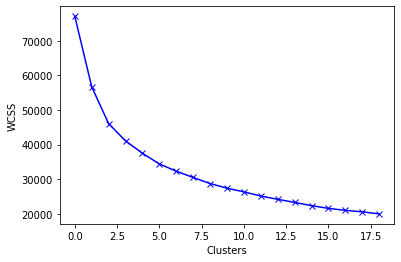

In [67]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

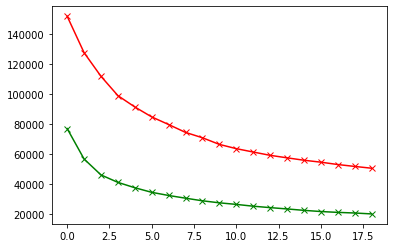

In [68]:
plt.plot(wcss_1, 'bx-', color = 'r')
plt.plot(wcss_2, 'bx-', color = 'g');

In [69]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(n_clusters=4)

In [70]:
labels = kmeans.labels_
labels, labels.shape

(array([0, 1, 0, ..., 0, 1, 1], dtype=int32), (8950,))

In [71]:
df_cluster_at = pd.concat([base, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [72]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.009740,-0.185587
1,1.504223,-1.378682
2,-1.243237,0.794263
3,0.015730,-0.022443
4,-1.195983,-0.131359


In [73]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.009740,-0.185587,0
1,1.504223,-1.378682,1
2,-1.243237,0.794263,0
3,0.015730,-0.022443,1
4,-1.195983,-0.131359,0


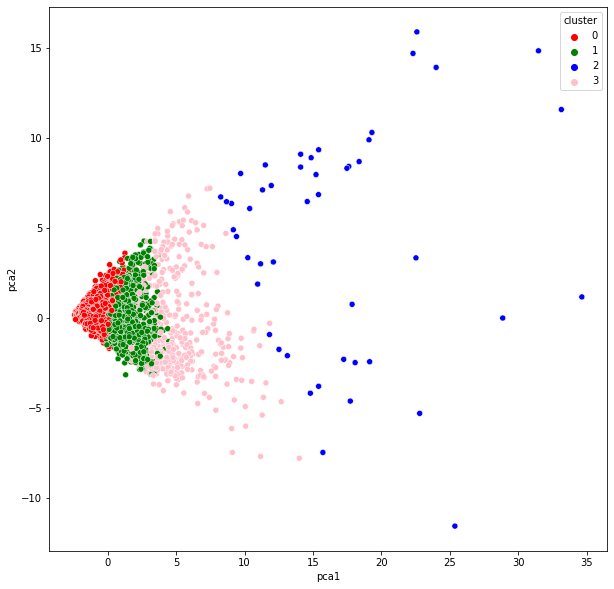

In [74]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink']);

In [75]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,0
5342,1478.552756,1.000000,479.10,311.10,168.00,901.677781,0.500000,0.416667,0.500000,0.083333,1,11,4500.0,4774.597215,478.802097,0.0,12,0
5341,7091.028361,1.000000,0.00,0.00,0.00,2137.809373,0.000000,0.000000,0.000000,0.250000,5,0,8500.0,1835.361842,2701.584337,0.0,12,0
5340,7030.446043,1.000000,3747.12,1053.08,2694.04,266.710051,1.000000,0.250000,1.000000,0.083333,1,70,14000.0,1968.080891,1635.841661,0.0,12,0
5338,8419.737786,1.000000,3050.48,1475.56,1574.92,2127.489462,1.000000,1.000000,1.000000,0.250000,5,67,12300.0,3298.741768,4239.303788,0.0,12,0


In [76]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
348,3536.601227,1.0,2132.93,959.10,1173.83,5340.016172,1.000000,0.333333,1.000000,0.750000,20,74,11000.0,8251.146946,834.025674,0.000000,12,3
2774,2748.868773,1.0,598.50,598.50,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,34,2000.0,518.300462,28483.254830,0.000000,12,3
2780,11930.784460,1.0,37.03,0.00,37.03,5171.710442,0.250000,0.000000,0.250000,0.500000,14,3,14000.0,3042.925661,2791.675875,0.000000,12,3
5079,2948.447663,1.0,0.00,0.00,0.00,1539.285222,0.000000,0.000000,0.000000,0.333333,13,0,3000.0,207.448103,13350.556820,0.000000,12,3
1208,2705.149599,1.0,328.61,247.95,80.66,6790.012504,0.333333,0.250000,0.083333,0.666667,26,6,7000.0,4724.801558,789.357067,0.083333,12,3


In [77]:
df_cluster_ordered.to_excel('cluster_ordereded.xls')

arquivo salvado e finalizado, gerando os clusters necessários para a análise que o marketing precisava